## IMS Hackathon Food Delivery_Time Prediction

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
import catboost
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import GradientBoostingClassifier 

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics
import seaborn as sns

from collections import Counter
from sklearn.model_selection import train_test_split
import os, sys, datetime
from time import time
from sklearn.model_selection import StratifiedKFold
from scipy import stats

%matplotlib inline

In [2]:
os.chdir('C:\\Users\\Anurag\\Documents')

In [3]:
# Extracting data
train = pd.read_excel('Data_Train.xlsx')
test = pd.read_excel('Data_Test.xlsx')
data = train.append(test, ignore_index=True,sort=False)
print(train.shape,test.shape,data.shape)

(11094, 9) (2774, 8) (13868, 9)


In [4]:
print(data.describe())

       Restaurant                                    Location      Cuisines  \
count       13868                                       13868         13868   
unique       8661                                          35          2392   
top       ID_5538  Mico Layout, Stage 2, BTM Layout,Bangalore  North Indian   
freq           26                                        1158          1076   

       Average_Cost Minimum_Order Rating  Votes Reviews Delivery_Time  
count         13868         13868  13868  13868   13868         11094  
unique           26            20     33   1181     811             7  
top            ₹200           ₹50      -      -       -    30 minutes  
freq           4061         12674   1496   2616    2905          7406  


In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13868 entries, 0 to 13867
Data columns (total 9 columns):
Restaurant       13868 non-null object
Location         13868 non-null object
Cuisines         13868 non-null object
Average_Cost     13868 non-null object
Minimum_Order    13868 non-null object
Rating           13868 non-null object
Votes            13868 non-null object
Reviews          13868 non-null object
Delivery_Time    11094 non-null object
dtypes: object(9)
memory usage: 975.2+ KB
None


In [6]:
data.describe(include=['O'])

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
count,13868,13868,13868,13868,13868,13868,13868,13868,11094
unique,8661,35,2392,26,20,33,1181,811,7
top,ID_5538,"Mico Layout, Stage 2, BTM Layout,Bangalore",North Indian,₹200,₹50,-,-,-,30 minutes
freq,26,1158,1076,4061,12674,1496,2616,2905,7406


In [7]:
# Checking Null values in the data
data.isnull().sum()

Restaurant          0
Location            0
Cuisines            0
Average_Cost        0
Minimum_Order       0
Rating              0
Votes               0
Reviews             0
Delivery_Time    2774
dtype: int64

In [8]:
#Representing unique values
data.nunique()

Restaurant       8661
Location           35
Cuisines         2392
Average_Cost       26
Minimum_Order      20
Rating             33
Votes            1181
Reviews           811
Delivery_Time       7
dtype: int64

In [9]:
#count of Delivery time
data['Delivery_Time'].value_counts()

30 minutes     7406
45 minutes     2665
65 minutes      923
120 minutes      62
20 minutes       20
80 minutes       14
10 minutes        4
Name: Delivery_Time, dtype: int64

In [10]:
data['Cuisines'] = data['Cuisines'].str.lower() #converting Cuisines to lowercase
data['Cuisines'] = data['Cuisines'].str.replace(' ','') # Removing whitespaces from cuisines
Cuisines_list = data['Cuisines'].str.split(',') # spliting the string of cuisines
Cuisines_counter = Counter(([a for b in Cuisines_list.tolist() for a in b])) # elements are stored as Dictionary key
Cuisines_counter # Representing count of each word from the splitted cuisines

Counter({'fastfood': 3862,
         'rolls': 620,
         'burger': 414,
         'salad': 284,
         'wraps': 97,
         'icecream': 480,
         'desserts': 1548,
         'italian': 751,
         'streetfood': 935,
         'mughlai': 1098,
         'northindian': 5999,
         'chinese': 4339,
         'cafe': 592,
         'beverages': 1789,
         'southindian': 1507,
         'thai': 205,
         'asian': 259,
         'mithai': 386,
         'momos': 397,
         'indonesian': 3,
         'biryani': 1161,
         'kerala': 73,
         'bihari': 14,
         'mexican': 143,
         'japanese': 72,
         'bakery': 864,
         'burmese': 13,
         'bubbletea': 6,
         'tea': 87,
         'pizza': 611,
         'lucknowi': 15,
         'mangalorean': 27,
         'european': 89,
         'continental': 694,
         'sandwich': 339,
         'healthyfood': 352,
         'bengali': 132,
         'american': 163,
         'mishti': 82,
         'hyderabadi'

In [11]:
# Replacing the Cuisines into a proper class
data['Cuisines'] = data['Cuisines'].str.replace('rolls','fastfood')
data['Cuisines'] = data['Cuisines'].str.replace('burger','fastfood')
data['Cuisines'] = data['Cuisines'].str.replace('wraps','fastfood')
data['Cuisines'] = data['Cuisines'].str.replace('streetfood','fastfood')
data['Cuisines'] = data['Cuisines'].str.replace('momos','fastfood')
data['Cuisines'] = data['Cuisines'].str.replace('sandwich','fastfood')
data['Cuisines'] = data['Cuisines'].str.replace('fingerfood','fastfood')
data['Cuisines'] = data['Cuisines'].str.replace('barfood','fastfood')
data['Cuisines'] = data['Cuisines'].str.replace('rawmeats','fastfood')
data['Cuisines'] = data['Cuisines'].str.replace('hotdogs','fastfood')
data['Cuisines'] = data['Cuisines'].str.replace('cafe','fastfood')
data['Cuisines'] = data['Cuisines'].str.replace('pizza','fastfood')

data['Cuisines'] = data['Cuisines'].str.replace('icecream','desserts')
data['Cuisines'] = data['Cuisines'].str.replace('mithai','desserts')
data['Cuisines'] = data['Cuisines'].str.replace('bakery','desserts')
data['Cuisines'] = data['Cuisines'].str.replace('bubbletea','desserts')
data['Cuisines'] = data['Cuisines'].str.replace('mishti','desserts')
data['Cuisines'] = data['Cuisines'].str.replace('paan','desserts')
data['Cuisines'] = data['Cuisines'].str.replace('frozenyogurt','desserts')

data['Cuisines'] = data['Cuisines'].str.replace('italian','european')
data['Cuisines'] = data['Cuisines'].str.replace('german','european')
data['Cuisines'] = data['Cuisines'].str.replace('spanish','european')
data['Cuisines'] = data['Cuisines'].str.replace('steak','european')
data['Cuisines'] = data['Cuisines'].str.replace('mediterranean','european')
data['Cuisines'] = data['Cuisines'].str.replace('brazilian','european')
data['Cuisines'] = data['Cuisines'].str.replace('belgian','european')
data['Cuisines'] = data['Cuisines'].str.replace('french','european')
data['Cuisines'] = data['Cuisines'].str.replace('portuguese','european')
data['Cuisines'] = data['Cuisines'].str.replace('african','european')
data['Cuisines'] = data['Cuisines'].str.replace('greek','european')

data['Cuisines'] = data['Cuisines'].str.replace('mexican','american')
data['Cuisines'] = data['Cuisines'].str.replace('bbq','american')
data['Cuisines'] = data['Cuisines'].str.replace('roastchicken','american')
data['Cuisines'] = data['Cuisines'].str.replace('charcoalchicken','american')
data['Cuisines'] = data['Cuisines'].str.replace('tex-mex','american')
data['Cuisines'] = data['Cuisines'].str.replace('southamerican','american')

data['Cuisines'] = data['Cuisines'].str.replace('arabian','middleeast')
data['Cuisines'] = data['Cuisines'].str.replace('kebab','middleeast')
data['Cuisines'] = data['Cuisines'].str.replace('lebanese','middleeast')
data['Cuisines'] = data['Cuisines'].str.replace('afghan','middleeast')
data['Cuisines'] = data['Cuisines'].str.replace('iranian','middleeast')
data['Cuisines'] = data['Cuisines'].str.replace('middleeastern','middleeast')
data['Cuisines'] = data['Cuisines'].str.replace('turkish','middleeast')
data['Cuisines'] = data['Cuisines'].str.replace('israeli','middleeast')

data['Cuisines'] = data['Cuisines'].str.replace('chinese','chinese')

data['Cuisines'] = data['Cuisines'].str.replace('kerala','regional')
data['Cuisines'] = data['Cuisines'].str.replace('bihari','regional')
data['Cuisines'] = data['Cuisines'].str.replace('Lucknowi','regional')
data['Cuisines'] = data['Cuisines'].str.replace('mangalorean','regional')
data['Cuisines'] = data['Cuisines'].str.replace('bengali','regional')
data['Cuisines'] = data['Cuisines'].str.replace('andhra','regional')
data['Cuisines'] = data['Cuisines'].str.replace('assamese','regional')
data['Cuisines'] = data['Cuisines'].str.replace('maharashtrian','regional')
data['Cuisines'] = data['Cuisines'].str.replace('chettinad','regional')
data['Cuisines'] = data['Cuisines'].str.replace('parsi','regional')
data['Cuisines'] = data['Cuisines'].str.replace('odia','regional')
data['Cuisines'] = data['Cuisines'].str.replace('tamil','regional')
data['Cuisines'] = data['Cuisines'].str.replace('northeastern','regional')
data['Cuisines'] = data['Cuisines'].str.replace('bohri','regional')
data['Cuisines'] = data['Cuisines'].str.replace('goan','regional')
data['Cuisines'] = data['Cuisines'].str.replace('gujarati','regional')
data['Cuisines'] = data['Cuisines'].str.replace('rajasthani','regional')
data['Cuisines'] = data['Cuisines'].str.replace('naga','regional')
data['Cuisines'] = data['Cuisines'].str.replace('awadhi','regional')
data['Cuisines'] = data['Cuisines'].str.replace('kashmiri','regional')
data['Cuisines'] = data['Cuisines'].str.replace('malwani','regional')

data['Cuisines'] = data['Cuisines'].str.replace('thai','seafood')
data['Cuisines'] = data['Cuisines'].str.replace('konkan','seafood')
data['Cuisines'] = data['Cuisines'].str.replace('srilankan','seafood')
data['Cuisines'] = data['Cuisines'].str.replace('poké','seafood')

data['Cuisines'] = data['Cuisines'].str.replace('indonesian','asian')
data['Cuisines'] = data['Cuisines'].str.replace('japanese','asian')
data['Cuisines'] = data['Cuisines'].str.replace('burmese','asian')
data['Cuisines'] = data['Cuisines'].str.replace('sushi','asian')
data['Cuisines'] = data['Cuisines'].str.replace('cantonese','asian')
data['Cuisines'] = data['Cuisines'].str.replace('tibetan','asian')
data['Cuisines'] = data['Cuisines'].str.replace('malaysian','asian')
data['Cuisines'] = data['Cuisines'].str.replace('vietnamese','asian')
data['Cuisines'] = data['Cuisines'].str.replace('korean','asian')
data['Cuisines'] = data['Cuisines'].str.replace('bangladeshi','asian')
data['Cuisines'] = data['Cuisines'].str.replace('nepalese','asian')


data['Cuisines'] = data['Cuisines'].str.replace('tea','beverages')
data['Cuisines'] = data['Cuisines'].str.replace('juices','beverages')
data['Cuisines'] = data['Cuisines'].str.replace('coffee','beverages')

data['Cuisines'] = data['Cuisines'].str.replace('hyderabadi','biryani')
data['Cuisines'] = data['Cuisines'].str.replace('lucknowi','biryani')

data['Cuisines'] = data['Cuisines'].str.replace('indian','northindian')
data['Cuisines'] = data['Cuisines'].str.replace('modernindian','northindian')
data['Cuisines'] = data['Cuisines'].str.replace('modernnorthindian','northindian')
data['Cuisines'] = data['Cuisines'].str.replace('northindian','northindian')
data['Cuisines'] = data['Cuisines'].str.replace('northnorthindian','northindian')


data['Cuisines'] = data['Cuisines'].str.replace('southnorthindian','southindian')

data['Cuisines'] = data['Cuisines'].str.replace('salad','healthyfood')

In [12]:
data.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","fastfood,fastfood,fastfood,healthyfood,fastfood",₹200,₹50,3.5,12,4,30 minutes
1,ID_2882,"Sector 3, Marathalli","desserts,desserts",₹100,₹50,3.5,11,4,30 minutes
2,ID_1595,Mumbai Central,"european,fastfood,fastfood",₹150,₹50,3.6,99,30,65 minutes
3,ID_5929,"Sector 1, Noida","mughlai,northindian,chinese",₹250,₹99,3.7,176,95,30 minutes
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","fastfood,beverages",₹200,₹99,3.2,521,235,65 minutes


In [13]:
data1=data.copy()

In [14]:
# Data Cleaning after categorising classes
data['Cuisines'] = data['Cuisines'].str.lower()
data['Cuisines'] = data['Cuisines'].str.replace(' ','')
Cuisines_list = data['Cuisines'].str.split(',')

In [15]:
# Removing the string "Mintutes" from the delivery time & converting it to numeric
data['Delivery_Time'] = data['Delivery_Time'].str.replace(' minutes','')
data['Delivery_Time']=pd.to_numeric(data['Delivery_Time'])

In [16]:
# Creating a new feature
data['City']=data.Location.str.rpartition(',')[2]
data['Locality']=data.Location.str.rpartition(',')[0]

In [17]:
data.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,City,Locality
0,ID_6321,"FTI College, Law College Road, Pune","fastfood,fastfood,fastfood,healthyfood,fastfood",₹200,₹50,3.5,12,4,30.0,Pune,"FTI College, Law College Road"
1,ID_2882,"Sector 3, Marathalli","desserts,desserts",₹100,₹50,3.5,11,4,30.0,Marathalli,Sector 3
2,ID_1595,Mumbai Central,"european,fastfood,fastfood",₹150,₹50,3.6,99,30,65.0,Mumbai Central,
3,ID_5929,"Sector 1, Noida","mughlai,northindian,chinese",₹250,₹99,3.7,176,95,30.0,Noida,Sector 1
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","fastfood,beverages",₹200,₹99,3.2,521,235,65.0,Whitefield,"Rmz Centennial, I Gate"


In [18]:
# cleaning data for Locality Feature
data.Locality[data.City.str.contains('Delhi University-GTB Nagar')]='Delhi University-GTB Nagar'
data.Locality[data.City.str.contains('Mumbai Central')]='Mumbai Central'
data.Locality[data.City.str.contains('Majestic')]='Majestic'
data.Locality[data.City.str.contains('Delhi Cantt.')]='Delhi Cantt'
data.Locality[data.City.str.contains('Pune University')]='Pune University'
data['Locality'] = data['Locality'].str.strip() 
data['Locality'] = data['Locality'].str.lower()

C:\Users\Anurag\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Anurag\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Anurag\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Anurag\Anaconda3\

In [19]:
# cleaning the City Feature created earlier
data.City[data.City.str.contains('Delhi University-GTB Nagar')]='Delhi'
data.City[data.City.str.contains('Mumbai CST Area')]='Mumbai'
data.City[data.City.str.contains('Mumbai Central')]='Mumbai'
data.City[data.City.str.contains('India Gate')]='Delhi'
data.City[data.City.str.contains('Delhi Cantt.')]='Delhi'
data.City[data.City.str.contains('Maharashtra')]='Pune'
data.City[data.City.str.contains('Pune University')]='Pune'
data.City[data.City.str.contains('Gurgoan')]='Gurgaon'
data.City[data.City.str.contains('Electronic City')]='Bangalore'

data['City'] = data['City'].str.strip()
data['City'] = data['City'].str.lower()
del data['Location']

C:\Users\Anurag\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Anurag\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Anurag\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Anurag\Anaconda3\

In [21]:
# cleaning average cost
data['Average_Cost'] = data['Average_Cost'].str.replace("[^0-9]","")
data['Average_Cost'] = data['Average_Cost'].str.strip()
data['Average_Cost']=pd.to_numeric(data['Average_Cost'])

data['Minimum_Order'] = data['Minimum_Order'].str.replace("[^0-9]","")
data['Minimum_Order'] = data['Minimum_Order'].str.strip()
data['Minimum_Order']=pd.to_numeric(data['Minimum_Order'])

In [22]:
#Cleaning Restaurant feature
data['Restaurant'] = data['Restaurant'].str.replace("ID_","")
data['Restaurant'] = data['Restaurant'].str.strip()
data['Restaurant']=pd.to_numeric(data['Restaurant'])

In [23]:
# Replacing values from Ratings
data.Rating = data.Rating.replace("NEW",np.nan)
data.Rating = data.Rating.replace("-",np.nan)
data.Rating = data.Rating.replace("Opening Soon",np.nan)
data.Rating = data.Rating.replace("Temporarily Closed",np.nan)
data.Rating = data.Rating.astype('float')

In [24]:
# Replacing value from votes
data.Votes = data.Votes.replace("-",np.nan)
data.Votes = data.Votes.astype('float')

In [25]:
# Replacing values from Reviews
data.Reviews = data.Reviews.replace("-",np.nan)
data.Reviews = data.Reviews.astype('float')

In [26]:
data.shape

(13868, 10)

In [27]:
# calculating total votes to review and sum of reviews

data['total_div_of_reviews'] = data['Votes']/data['Reviews']
data['total_sum_of_reviews'] = data['Votes']*data['Reviews']

data['total_div_of_ratings'] = data['Votes']/data['Rating']
data['total_sum_of_ratings'] = data['Votes']*data['Rating']

data['total_div_of_Minimum_Order'] = data['Votes']/data['Minimum_Order']
data['total_sum_of_Minimum_Order'] = data['Votes']*data['Minimum_Order']

data['total_div_of_Average_Cost'] = data['Votes']/data['Average_Cost']
data['total_sum_of_Average_Cost'] = data['Votes']*data['Average_Cost']

data['total_div_of_ratings_Reviews'] = data['Rating']/data['Reviews']
data['total_sum_of_ratings_1'] = data['Rating']*data['Reviews']

data['total_div_of_Minimum_Order_1'] = data['Rating']/data['Minimum_Order']
data['total_sum_of_Minimum_Order_1'] = data['Rating']*data['Minimum_Order']

data['total_div_of_Average_Cost_1'] = data['Rating']/data['Average_Cost']
data['total_sum_of_Average_Cost_1'] = data['Rating']*data['Average_Cost']

data['total_div_of_reviews_Minimum_Order_1'] = data['Reviews']/data['Minimum_Order']
data['total_sum_of_reviews_Minimum_Order_1'] = data['Reviews']*data['Minimum_Order']

data['total_div_of_reviews_Average_Cost_1'] = data['Reviews']/data['Average_Cost']
data['total_sum_of_reviews_Average_Cost_1'] = data['Reviews']*data['Average_Cost']

data['total_div_of_Minimum_Order_Average_Cost_1'] = data['Average_Cost']/data['Minimum_Order']
data['total_sum_of_Minimum_Order_Average_Cost_1'] = data['Average_Cost']*data['Minimum_Order']

In [28]:
# Applying the same to the copied data

data1['total_div_of_reviews']  = data['total_div_of_reviews']
data1['total_div_of_ratings']  = data['total_div_of_ratings']
data1['total_sum_of_Average_Cost']  = data['total_sum_of_Average_Cost']
data1['total_div_of_Average_Cost_1']  = data['total_div_of_Average_Cost_1']
data1['total_div_of_Minimum_Order_1']  = data['total_div_of_Minimum_Order_1']
data1['total_sum_of_Minimum_Order']  = data['total_sum_of_Minimum_Order']
data1['total_div_of_Average_Cost']  = data['total_div_of_Average_Cost']
data1['total_div_of_ratings_Reviews']  = data['total_div_of_ratings_Reviews']
data1['total_div_of_reviews_Average_Cost_1']  = data['total_div_of_reviews_Average_Cost_1']
data1['total_sum_of_Average_Cost_1']  = data['total_sum_of_Average_Cost_1']
data1['total_sum_of_reviews_Minimum_Order_1']  = data['total_sum_of_reviews_Minimum_Order_1']
data1['total_div_of_Minimum_Order']  = data['total_div_of_Minimum_Order']
data1['total_sum_of_ratings_1']  = data['total_sum_of_ratings_1']
data1['total_sum_of_reviews']  = data['total_sum_of_reviews']
data1['total_sum_of_ratings']  = data['total_sum_of_ratings']
data1['total_sum_of_reviews_Average_Cost_1']  = data['total_sum_of_reviews_Average_Cost_1']
data1['total_sum_of_Minimum_Order_1']  = data['total_sum_of_Minimum_Order_1']
data1['total_div_of_reviews_Minimum_Order_1']  = data['total_div_of_reviews_Minimum_Order_1']
data1['total_div_of_Minimum_Order_Average_Cost_1']  = data['total_div_of_Minimum_Order_Average_Cost_1']
data1['total_sum_of_Minimum_Order_Average_Cost_1']  = data['total_sum_of_Minimum_Order_Average_Cost_1']

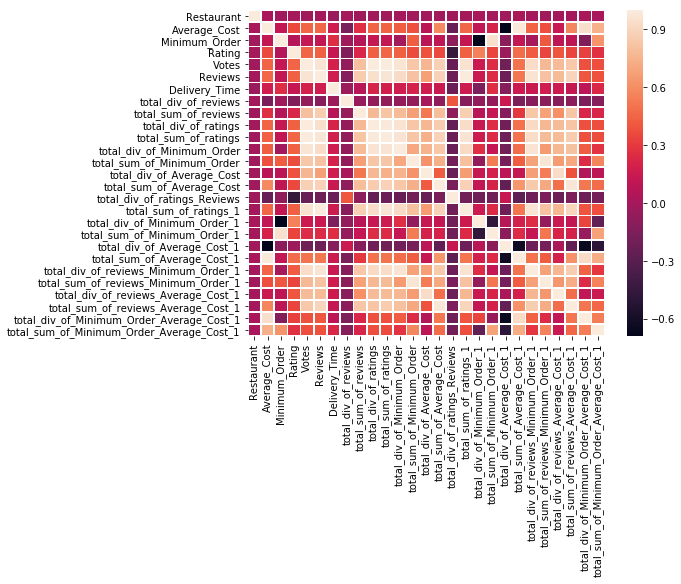

In [29]:
# calculate the correlation matrix
corr = data.corr()

# plot the heatmap
fig = plt.figure(figsize=(12,10))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            linewidths=.75)

In [30]:
# dividing the data as per the the problem statement
train_x=data1[~data1['Delivery_Time'].isnull()]
train_y=train_x['Delivery_Time']
test_x=data1[data1['Delivery_Time'].isnull()]

del train_x['Delivery_Time']
del test_x['Delivery_Time']

In [31]:
# Train-test Split
X_train, X_valid, y_train, y_valid = train_test_split(train_x, train_y, test_size = 0.2, random_state = 555, stratify=train_y)

## CatBoost Classifier

In [32]:
categorical_features_indices = np.where(X_train.dtypes =='object')[0]
categorical_features_indices

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [33]:
# Defining a function
def make_classifier():
    model = catboost.CatBoostClassifier(
        iterations=30000,
        random_state=555,
        learning_rate=0.01,
        loss_function='MultiClass',
        early_stopping_rounds=200,
    )
    return model

In [34]:
start_time = time()

NFOLDS = 5
folds = StratifiedKFold(n_splits=NFOLDS, shuffle=False, random_state=18121995)
models = []
scores = []
for fold, (train_ids, test_ids) in enumerate(folds.split(train_x, train_y)):
    print('● Fold :', fold+1)
    model = make_classifier()
    model.fit(train_x.loc[train_ids], train_y.loc[train_ids], 
              eval_set=(train_x.loc[test_ids], train_y.loc[test_ids]),
              use_best_model=False,
              verbose=500,
              cat_features=categorical_features_indices)    
    models.append(model)
    print('\n')

print('finished in {}'.format( 
    str(datetime.timedelta(seconds=time() - start_time))))

C:\Users\Anurag\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


● Fold : 1
0:	learn: 1.9155042	test: 1.9158182	best: 1.9158182 (0)	total: 107ms	remaining: 53m 26s
500:	learn: 0.5766896	test: 0.5004540	best: 0.5004540 (500)	total: 1m 19s	remaining: 1h 18m 18s
1000:	learn: 0.5394875	test: 0.4793321	best: 0.4793321 (1000)	total: 2m 55s	remaining: 1h 24m 56s
1500:	learn: 0.5115263	test: 0.4703008	best: 0.4703008 (1500)	total: 4m 34s	remaining: 1h 26m 44s
2000:	learn: 0.4898139	test: 0.4667328	best: 0.4667328 (2000)	total: 6m 6s	remaining: 1h 25m 22s
2500:	learn: 0.4713885	test: 0.4644440	best: 0.4644003 (2488)	total: 7m 36s	remaining: 1h 23m 38s
3000:	learn: 0.4551365	test: 0.4630392	best: 0.4630320 (2982)	total: 9m 7s	remaining: 1h 22m 1s
3500:	learn: 0.4396810	test: 0.4624211	best: 0.4624183 (3499)	total: 10m 37s	remaining: 1h 20m 21s
4000:	learn: 0.4250843	test: 0.4618108	best: 0.4617121 (3940)	total: 12m 4s	remaining: 1h 18m 24s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.4615220625
bestIteration = 4185



● Fold : 2
0:	lea

## Max Voting Classifier

In [36]:
predictions = []
for model in models:
    predictions.append(model.predict(train_x).astype(str))
predictions = np.concatenate(predictions, axis=1)
df = pd.DataFrame(predictions)

vote = stats.mode(predictions, axis=1)[0].reshape(-1)
df['vote'] = vote
df['y'] = train_y
df

C:\Users\Anurag\Anaconda3\lib\site-packages\scipy\stats\stats.py:248: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


,0,1,2,3,4,vote,y
0,30 minutes,30 minutes,30 minutes,30 minutes,30 minutes,30 minutes,30 minutes
1,30 minutes,30 minutes,30 minutes,30 minutes,30 minutes,30 minutes,30 minutes
2,65 minutes,65 minutes,65 minutes,65 minutes,65 minutes,65 minutes,65 minutes
3,30 minutes,30 minutes,30 minutes,30 minutes,30 minutes,30 minutes,30 minutes
4,45 minutes,65 minutes,65 minutes,65 minutes,65 minutes,65 minutes,65 minutes
5,30 minutes,30 minutes,30 minutes,30 minutes,30 minutes,30 minutes,30 minutes
6,30 minutes,30 minutes,30 minutes,30 minutes,30 minutes,30 minutes,30 minutes
7,45 minutes,45 minutes,45 minutes,45 minutes,45 minutes,45 minutes,45 minutes
8,30 minutes,30 minutes,30 minutes,30 minutes,30 minutes,30 minutes,30 minutes
9,45 minutes,65 minutes,65 minutes,65 minutes,65 minutes,65 minutes,65 minutes


In [37]:
predictions = []
for model in models:
    predictions.append(model.predict(test_x))
predictions = np.concatenate(predictions, axis=1)
# Voting
predictions = stats.mode(predictions, axis=1)[0].reshape(-1)
print(predictions.shape)

(2774,)


## Important Features

In [41]:
sorted(zip(model.feature_importances_,train_x),reverse=True)

[(13.541492460626262, 'Location'),
 (10.264269892652731, 'Rating'),
 (9.648971011779384, 'Cuisines'),
 (8.840650440385657, 'Votes'),
 (7.257504877515645, 'total_div_of_reviews'),
 (7.146905795581991, 'Restaurant'),
 (6.509275467702878, 'Average_Cost'),
 (5.995549385883513, 'Reviews'),
 (5.451212263786058, 'Minimum_Order'),
 (2.6241027082182575, 'total_div_of_Average_Cost_1'),
 (2.278813987042289, 'total_div_of_Average_Cost'),
 (2.249592816021978, 'total_div_of_Minimum_Order_1'),
 (2.085933433328267, 'total_sum_of_Average_Cost'),
 (1.8263479683094312, 'total_div_of_ratings'),
 (1.6783564964422608, 'total_sum_of_Average_Cost_1'),
 (1.660126317694652, 'total_sum_of_Minimum_Order'),
 (1.3780085171254406, 'total_sum_of_Minimum_Order_1'),
 (1.2397625298630806, 'total_div_of_reviews_Average_Cost_1'),
 (1.237468586637651, 'total_sum_of_ratings'),
 (1.211601416638853, 'total_div_of_ratings_Reviews'),
 (1.0492029290153146, 'total_div_of_Minimum_Order'),
 (1.043443140935258, 'total_sum_of_reviews

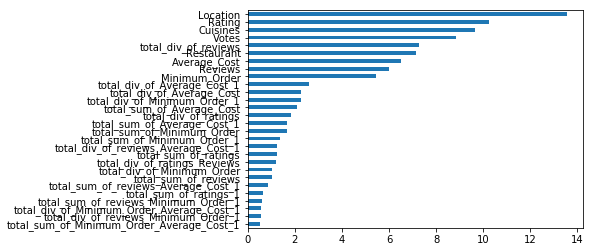

In [42]:
# Representing important Features
feat_importances=pd.Series(model.feature_importances_,index=train_x.columns)
feat_importances.nsmallest(1000).plot(kind='barh')
plt.show()